# Estudo do Mercado Financeiro (Bancos) - Este notebook utiliza a biblioteca yfinance e outras para analista algumas ações da bolsa de valores

### Site:       https://filipedeabreu.com

### Autor:      Filipe de Abreu

### Manutenção:  Filipe de Abreu

<hr>

# Testado em
### OS: Windows 11                                      
### Versão do python: 3.12.7                                     

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

In [3]:
#Função que retorna informações de um papel com base no input de um usuário
def cria_dataframe(acao, periodo):
    acao_santander =  yf.Ticker(acao)
    data = acao_santander.history(period=periodo)
    return data

### Cnsultando a ação do <font color='red'> Santander </font> ('SANB11.SA') no período de 1 ano ('1y')

In [4]:
df_santander = cria_dataframe('SANB11.SA','1y') #Selecionado a ação do santander, no periodo de 1 ano
df_santander.head(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-11-01 00:00:00-03:00,25.561931,25.988122,25.495635,25.760820,2652900,0.0,0.0
2023-11-03 00:00:00-03:00,26.310133,26.480608,26.158599,26.291191,5541900,0.0,0.0
2023-11-06 00:00:00-03:00,26.376429,26.471139,26.130186,26.291191,1824600,0.0,0.0
2023-11-07 00:00:00-03:00,26.310133,26.982565,26.243835,26.935211,2709000,0.0,0.0
2023-11-08 00:00:00-03:00,27.086743,27.645525,27.020447,27.626583,1854200,0.0,0.0
2023-11-09 00:00:00-03:00,27.844416,27.986479,27.484523,27.664469,1610100,0.0,0.0
2023-11-10 00:00:00-03:00,27.958067,28.488437,27.541348,28.289549,2451800,0.0,0.0
2023-11-13 00:00:00-03:00,28.204311,28.478966,27.977010,28.478966,1253600,0.0,0.0
2023-11-14 00:00:00-03:00,28.639968,29.170338,28.175895,29.170338,2109900,0.0,0.0


In [57]:
df_santander[['Dividends', 'Stock Splits']].head(30)

,Dividends,Stock Splits
Date,,
2023-11-01 00:00:00-03:00,0.000,0.000
2023-11-03 00:00:00-03:00,0.000,0.000
2023-11-06 00:00:00-03:00,0.000,0.000
2023-11-07 00:00:00-03:00,0.000,0.000
2023-11-08 00:00:00-03:00,0.000,0.000
2023-11-09 00:00:00-03:00,0.000,0.000
2023-11-10 00:00:00-03:00,0.000,0.000
2023-11-13 00:00:00-03:00,0.000,0.000
2023-11-14 00:00:00-03:00,0.000,0.000


In [64]:
df_santander['Stock Splits'][ df_santander['Stock Splits'] != 0]

Series([], Name: Stock Splits, dtype: float64)

In [66]:
df_santander['Dividends'][ df_santander['Dividends'] != 0]

Date
2024-01-22 00:00:00-03:00   0.403
2024-04-22 00:00:00-03:00   0.402
2024-07-22 00:00:00-03:00   0.403
2024-10-18 00:00:00-03:00   0.349
Name: Dividends, dtype: float64

### Primeiras impressoes

O dataframe apresenta váriaveis quantitativas continuas e não há variaveis categóricas, o index poderia talvez ser reduzido, deixando apenas a data e tirando a hora, já que não pretendo analisar de forma precisa o horário de abertura ou fechamento das ações. Se trata de dados populacionas, portanto, para qualquer analise estatisca, deve se ter em mente que sao dados populacionas, e nao de uma amsotra.

As variaveis 'Dividends' e 'Stock Splits' já de ínicio, apresentaram muitos valores iguais a 0, analisando essa variaveis separadamente, observei que apenas a variavel 'Dividends' possui valores diferentes de zero, porém em apenas 4 observações, portanto, irei remover essas variáveis  do dataframe

In [69]:
df_santander.drop(['Dividends', 'Stock Splits'], axis = 1, inplace = True)

### Extraindo algumas informações básicas do dataset

In [70]:
df_santander.info() #tipos de dados
#Não há campos NaN para serem tratados

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2023-11-01 00:00:00-03:00 to 2024-11-01 00:00:00-03:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    253 non-null    float64
 1   High    253 non-null    float64
 2   Low     253 non-null    float64
 3   Close   253 non-null    float64
 4   Volume  253 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 11.9 KB


In [71]:
print(f'Numero de observações: {df_santander.shape[0]} \nNúmero de variáveis: {df_santander.shape[1]}')  #formato

Numero de observações: 253 
Número de variáveis: 5


### Um pouco de estatística descritiva básica

In [80]:
df_santander_descritivo = df_santander.describe()

#Renomeando o index
df_santander_descritivo.index = ['Contagem','Média','Desvio Padrão', 'Mínimo', '1° Quartil', '2° Quartil', '3° Quartil', 'Máximo']

#Defining o numero de casas decimais para 3
pd.set_option('float.format','{:.3f}'.format)

#Printando o novo data set
df_santander_descritivo

,Open,High,Low,Close,Volume
Contagem,253.000,253.000,253.000,253.000,253.000
Média,28.188,28.461,27.921,28.190,2672597.233
Desvio Padrão,1.340,1.354,1.339,1.346,4538007.966
Mínimo,25.523,25.888,25.418,25.466,0.000
1° Quartil,27.174,27.465,26.958,27.146,1462100.000
2° Quartil,27.981,28.383,27.789,28.040,1966000.000
3° Quartil,29.028,29.331,28.763,28.981,2940600.000
Máximo,31.258,31.594,31.130,31.386,71189700.000


In [81]:
#Utilizando medidadas de dispersao, coeficiente de variancia


#Calculando coeficiente de variação para as variaveis Open, High, Low e Close

coeficientes_de_variacao = []
for i in range (0,5):
    coeficientes_de_variacao.append((df_santander_descritivo.iloc[2, i] / df_santander_descritivo.iloc[1, i]) * 100)

#Adcionando a porcentagem, tendo em vista que o coeficiente da variação é obsavardo em porcentagem
coeficientes_com_porcentagem = [f"{coeficientes_de_variacao:.3f}%" for coeficientes_de_variacao in coeficientes_de_variacao]

#CV = Coeficiente de variação
pd.Series(coeficientes_com_porcentagem, index=['CV_Open:','CV_High:','CV_Low:','CV_Close:', 'CV_Volume:'])

CV_Open:        4.754%
CV_High:        4.756%
CV_Low:         4.795%
CV_Close:       4.775%
CV_Volume:    169.798%
dtype: object

In [102]:
variancias = []

for i in range(0,5):
    variancias.append(df_santander.iloc[:, i].var())

variancias

[1.7958681424363343,
 1.832607485248416,
 1.7928156036230785,
 1.811988590455867,
 20593516296222.47]

In [103]:
#Adcionando os coeficientes de variação ao datagFrame
df_santander_descritivo.loc['Coeficiente de Variação'] = coeficientes_com_porcentagem

#Adcionando as variancias o ao datagFrame
df_santander_descritivo.loc['Variancia'] = variancias

df_santander_descritivo

,Open,High,Low,Close,Volume
Contagem,253.000,253.000,253.000,253.000,253.000
Média,28.188,28.461,27.921,28.190,2672597.233
Desvio Padrão,1.340,1.354,1.339,1.346,4538007.966
Mínimo,25.523,25.888,25.418,25.466,0.000
1° Quartil,27.174,27.465,26.958,27.146,1462100.000
2° Quartil,27.981,28.383,27.789,28.040,1966000.000
3° Quartil,29.028,29.331,28.763,28.981,2940600.000
Máximo,31.258,31.594,31.130,31.386,71189700.000
Coeficiente de Variação,4.754%,4.756%,4.795%,4.775%,169.798%
Variancia,1.796,1.833,1.793,1.812,20593516296222.469


In [35]:
# Original list
numbers = [4.754091219806265, 4.756400366581956, 4.795465915174658, 4.7751099664268475]

# Append '%' to each element
numbers_with_percent = [f"{num}%" for num in numbers]

print(numbers_with_percent)

['4.754091219806265%', '4.756400366581956%', '4.795465915174658%', '4.7751099664268475%']


### O que se pode observar das estatiscas acima?

Em média, o valor de abertura da ação não é muito diferente do valor de fechamento. Tirando a variavel "Volume", o coeficiente de variação foi menor que 10% para todas as variaveis que os dados são significativamente homogêneos, ou seja, não são muitos dispersos

### Algumas informações gráficas simples

In [9]:
df_santander['Close'].max()

31.386415481567383

Text(2024-10-22 00:00:00-03:00, 28.289953008659275, 'Média')

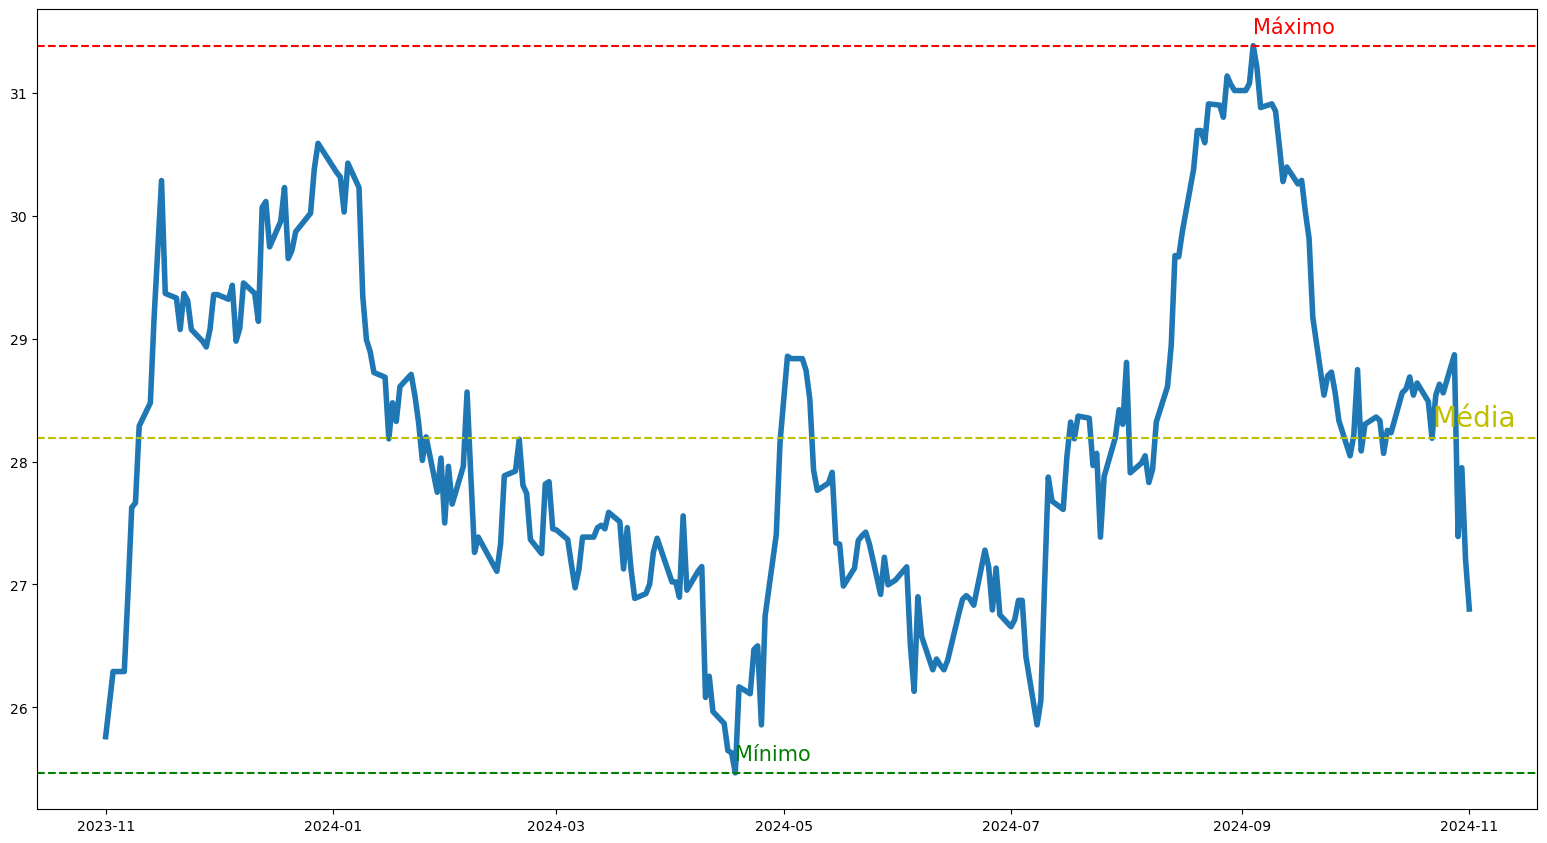

In [12]:
#Analisando apenas a variable "Close"

#Plotando um graáfico de linha
fig = plt.figure(figsize=(15,8))
ax = fig.add_axes([0, 0, 1, 1])
ax.plot(df_santander.index, df_santander['Close'], linewidth=4)

#Traçando uma linha rente ao valor maximo ja atingido lo papel
ax.axhline(df_santander['Close'].max(), c= 'r', ls = '--')
ax.annotate("Máximo", 
            (df_santander['Close'].idxmax(), df_santander['Close'].max() + 0.1),
            fontsize=15,
            c= 'r'
           )

#Traçando uma linha rente ao valor mínimo ja atingido lo papel
ax.axhline(df_santander['Close'].min(), c='g', ls = '--')
ax.annotate("Mínimo", 
            (df_santander['Close'].idxmin(), df_santander['Close'].min() + 0.1),
            fontsize=15,
            c='g'
           )

#Traçando uma linha rente a média ja atingido lo papel
ax.axhline(df_santander['Close'].mean(), c='y', ls = '--')
ax.annotate("Média", 
            ((df_santander['Close'] - df_santander['Close'].mean()).abs().idxmin(), df_santander['Close'].mean() + 0.1),
            fontsize=20,
            c='y'
           )


<Axes: xlabel='Close', ylabel='Count'>

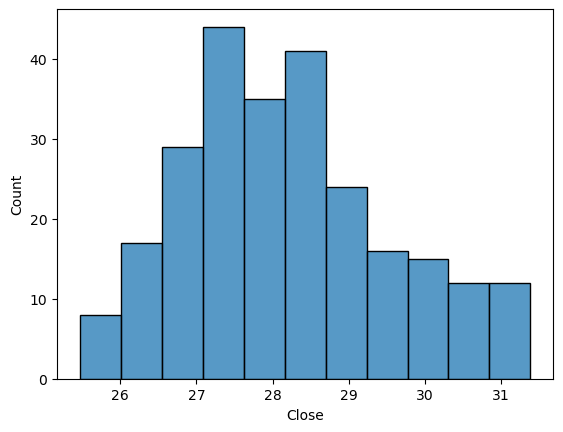

In [11]:
#Analisando a distribuição
sns.histplot(df_santander['Close'])

### Tratamento do dataframe santander